<a href="https://colab.research.google.com/github/denisa-s/Python/blob/main/Lab_recapitulativ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laborator recapitulativ Machine Learning**

Salvati acest notebook in drive, iar dupa rezolvare incarcati linkul de sharing in assignementul de pe moodle aferent laboratorului.

***Cerinte***


1.   Descarcati un set de date pentru clasificare de pe platforma [kaggle.com ](https://kaggle.com ). [Exemplu de cautare: https://www.kaggle.com/datasets?search=classification ]
2.   Puteti utiliza Numpy sau/si Pandas pentru a incarca setul de date.
3. Realizati vizualizari ale variabilelor din setul de date pentru a observa distributia (folositi matplotlib).
4. Impartiti setul de date in training (70%) si validare (30%).
4. Adaugati 3 algoritmi diferiti de clasificare pe care sa ii rulati pe setul de training si sa verificati performanta pe setul de validare. Utilizati ***accuracy*** ca si masura a performantei.
5. Afisati automat cea mai buna performanta si numele algoritmului castigator.

Utilizati template-ul de mai jos pentru a introduce codul aferent.






Import bibillioteci:

In [ ]:
#Introduceti aici codul pentru importul tuturor bibliotecilor folosite
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt
!pip install graphviz
!pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import seaborn as sns 
from sklearn.neural_network import MLPClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Incarcare date:

In [ ]:
#Introuceti aici codul pentru incarcarea setului de date
train_data = pd.read_csv('train.csv')
train = train_data.copy()
test_data = pd.read_csv('test.csv')
test = test_data.copy()

Vizualizari:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

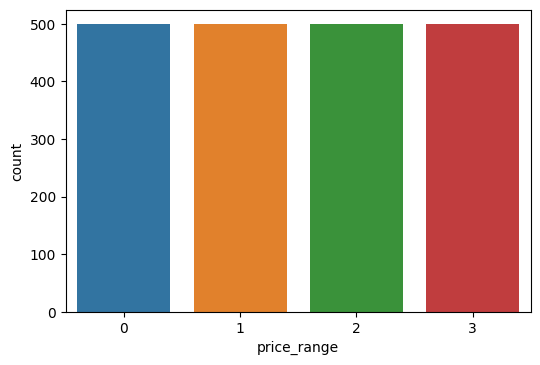

In [ ]:
#Introduceti aici codul pentru realizarea vizualizarilor
train.head()
train.info()
plt.figure(dpi=100)
sns.countplot(x=train['price_range'])
plt.show()

Partitionare date:

In [ ]:
#Introduceti aici codul pentru partitionarea datelor 70% training-30% validare
#Definirea variabilei tinta
y=train.price_range
X=train.drop(columns='price_range')
X.head()
scaler = StandardScaler()
scaler.fit(X)
x_transformed = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=1)

Algoritm 1 (Regresie logistica):

In [ ]:
#Introduceti aici codul pentru clasificare folosind regresie logistica 
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Algoritm 2 (Arbori de decizie):

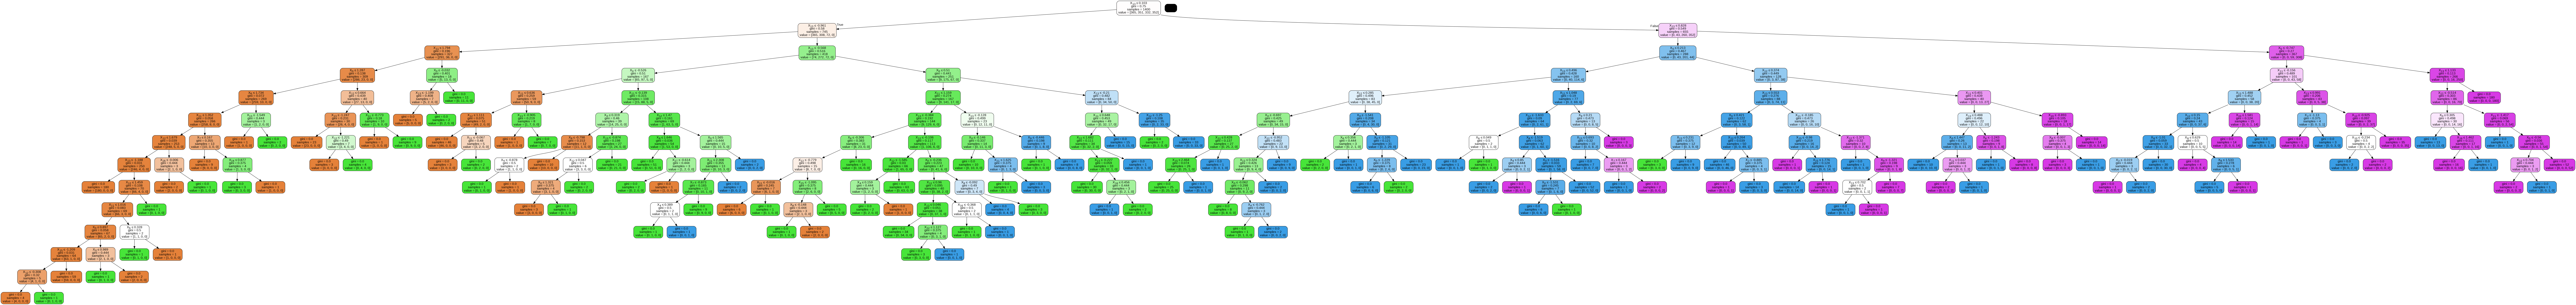

In [ ]:
#Introduceti aici codul pentru clasificare folosind un arbore de decizie
#definire model
clf = DecisionTreeClassifier()

#Antrenament
clf = clf.fit(X_train,y_train)

#Predictie
y_pred = clf.predict(X_test)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mob.png')
Image(graph.create_png())

Algoritm 3 (Retele neuronale):

In [ ]:
#Introduceti aici codul pentru clasificare folosind o retea neuronala
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
neuro = MLPClassifier(hidden_layer_sizes = (21,21,4),random_state = 1,learning_rate_init = 0.01 ,activation = 'relu')
neuro.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(21, 21, 4), learning_rate_init=0.01,
              random_state=1)

Comparati performantele celor 3 algoritmi:

In [ ]:
##Introduceti aici codul pentru afisarea algoritmului cu performanta cea mai ridicata si a valorii accuracy
print("Acuratetea prin regresie logistica:"+str(accuracy_score(y_test_pred,y_test)))
print("Acuratetea arborelui de decizie:", metrics.accuracy_score(y_test, y_pred))
print("Acuratetea retelei neuronale: ", neuro.score(X_test, y_test))
print("Algoritmul cu performanta cea mai ridicata este regresia logistica:"+str(accuracy_score(y_test_pred,y_test)))

Acuratetea prin regresie logistica:0.935
Acuratetea arborelui de decizie: 0.8583333333333333
Acuratetea retelei neuronale:  0.8816666666666667
Algoritmul cu performanta cea mai ridicata este regresia logistica:0.935


---
***Nu uitati sa incarcati linkul in assignementul laboratorului pe moodle***